In [49]:
#Ativar o drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [50]:
# Bibliotecas
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [102]:
df = pd.read_csv('/content/drive/MyDrive/exemplo_dell/data/dados.csv')
display(df)

ID do Negócio Data de Início do Contrato  Duração do Contrato (Meses)  \
0                  1                 2022-01-01                           12   
1                  2                 2022-01-01                           11   
2                  3                 2022-01-01                           12   
3                  4                 2022-01-01                            4   
4                  5                 2022-01-01                            4   
...              ...                        ...                          ...   
19995           9996                 2022-12-30                           12   
19996           9997                 2022-12-30                           13   
19997           9998                 2022-12-30                            6   
19998           9999                 2022-12-30                           13   
19999          10000                 2022-12-31                           21   

      Tipo de Produto  Valor Total da Venda  Validade dos Preços     rotulo  
0           Produto B               1032425                   14  goal_lite  
1           Produto B               1980570                   29  goal_lite  
2           Produto A               1847587                   11  goal_lite  
3           Produto A               1207038                   12  goal_lite  
4           Produto B                 88286                   17  goal_lite  
...               ...                   ...                  ...        ...  
19995       Produto B            4586486457                   44       goal  
19996       Produto B            1640324908                   42       goal  
19997       Produto A            1735086215                   42       goal  
19998       Produto A            2313348615                   38       goal  
19999       Produto B            2759648994                   60       goal  

[20000 rows x 7 columns]

In [103]:
df.shape

(20000, 7)

# EDA E PRÉ-PROCESSAMENTO

In [53]:
df.columns

Index(['ID do Negócio', 'Data de Início do Contrato',
       'Duração do Contrato (Meses)', 'Tipo de Produto',
       'Valor Total da Venda', 'Validade dos Preços', 'rotulo'],
      dtype='object')

In [54]:
df.dtypes

ID do Negócio                   int64
Data de Início do Contrato     object
Duração do Contrato (Meses)     int64
Tipo de Produto                object
Valor Total da Venda            int64
Validade dos Preços             int64
rotulo                         object
dtype: object

In [55]:
df.isnull().any().sum() 

0

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID do Negócio                20000 non-null  int64 
 1   Data de Início do Contrato   20000 non-null  object
 2   Duração do Contrato (Meses)  20000 non-null  int64 
 3   Tipo de Produto              20000 non-null  object
 4   Valor Total da Venda         20000 non-null  int64 
 5   Validade dos Preços          20000 non-null  int64 
 6   rotulo                       20000 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


    - Data de Início do Contrato --> variável do tipo data, porém, ela está como string;





In [104]:
df['Data de Início do Contrato'] = pd.to_datetime(df['Data de Início do Contrato'], infer_datetime_format=True)

In [105]:
df['Tipo de Produto'].value_counts()

Produto A    6808
Produto B    6641
Produto C    6551
Name: Tipo de Produto, dtype: int64

Como tem poucas classes, vamos substituir por números usando o Label Encoder

In [106]:
le = LabelEncoder()
df['Tipo de Produto'] = le.fit_transform(df['Tipo de Produto'])

In [107]:
le.classes_

array(['Produto A', 'Produto B', 'Produto C'], dtype=object)

In [108]:
mapeamento = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapeamento)

{'Produto A': 0, 'Produto B': 1, 'Produto C': 2}


In [109]:
df.dtypes

ID do Negócio                           int64
Data de Início do Contrato     datetime64[ns]
Duração do Contrato (Meses)             int64
Tipo de Produto                         int64
Valor Total da Venda                    int64
Validade dos Preços                     int64
rotulo                                 object
dtype: object

In [110]:
le = LabelEncoder()
df['rotulo'] = le.fit_transform(df['rotulo'])

In [111]:
mapeamento = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapeamento)

{'goal': 0, 'goal_lite': 1}


In [112]:
df.dtypes

ID do Negócio                           int64
Data de Início do Contrato     datetime64[ns]
Duração do Contrato (Meses)             int64
Tipo de Produto                         int64
Valor Total da Venda                    int64
Validade dos Preços                     int64
rotulo                                  int64
dtype: object

In [113]:
df.isnull().sum()

ID do Negócio                  0
Data de Início do Contrato     0
Duração do Contrato (Meses)    0
Tipo de Produto                0
Valor Total da Venda           0
Validade dos Preços            0
rotulo                         0
dtype: int64

## Detectando Outliers

In [67]:
import seaborn as sns


<Axes: >

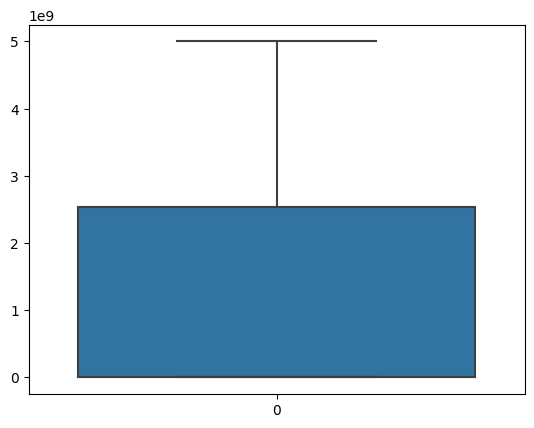

In [68]:
sns.boxplot(df['Valor Total da Venda'])

<Axes: >

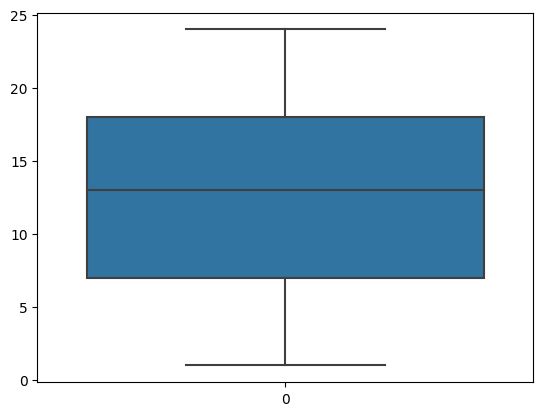

In [69]:
sns.boxplot(df['Duração do Contrato (Meses)'])

# Divisão dos dados

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
from numpy import float64
x = df.drop(columns = ['rotulo', 'Data de Início do Contrato'], axis = 1).astype('float64')
y = df['rotulo']

In [116]:
print(x.describe())

       ID do Negócio  Duração do Contrato (Meses)  Tipo de Produto  \
count   20000.000000                 20000.000000     20000.000000   
mean     5000.500000                    12.493700         0.987150   
std      2886.823503                     6.919144         0.817201   
min         1.000000                     1.000000         0.000000   
25%      2500.750000                     7.000000         0.000000   
50%      5000.500000                    13.000000         1.000000   
75%      7500.250000                    18.000000         2.000000   
max     10000.000000                    24.000000         2.000000   

       Valor Total da Venda  Validade dos Preços  
count          2.000000e+04         20000.000000  
mean           1.263967e+09            30.594650  
std            1.618269e+09            17.154249  
min            1.110000e+02             1.000000  
25%            1.515787e+06            16.000000  
50%            2.998403e+06            30.000000  
75%         

In [117]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [118]:
x.shape, y.shape

((20000, 5), (20000,))

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [120]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((14000, 5), (6000, 5), (14000,), (6000,))

# Modelo

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.naive_bayes import GaussianNB


from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             classification_report, confusion_matrix, f1_score,
                             matthews_corrcoef)
from xgboost import XGBClassifier
import time
from multiprocessing import cpu_count

from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

In [122]:
def treina_modelos(x, y, experimento, njobs=-1):
    
    # Criação dos modelos
    models = []
    models.append(('Calibrated-LSVC', CalibratedClassifierCV(LinearSVC(random_state=314, class_weight='balanced'))))
    models.append(('LR', LogisticRegression(random_state=42, n_jobs=-1, class_weight='balanced',  max_iter = 100, solver = "lbfgs" )))
    models.append(('RF', RandomForestClassifier(random_state=314, n_jobs=-1, class_weight='balanced')))
    models.append(('LGBM', lgb.LGBMClassifier(random_state=314, n_jobs=-1, class_weight='balanced')))
    models.append(('XGB', XGBClassifier(random_state=314, n_jobs=-1, class_weight='balanced', tree_method='gpu_hist', gpu_id=0)))
    models.append(('MLP', MLPClassifier(random_state=314)))
    models.append(('SGD', SGDClassifier(random_state=314, n_jobs=-1, class_weight='balanced')))
    models.append(('NB', MultinomialNB()))
    models.append(('SVC', SVC(random_state=314, class_weight='balanced')))
    models.append(('LSVC', LinearSVC(random_state=314, class_weight='balanced')))
    models.append(('KNN', KNeighborsClassifier(n_jobs=-1)))
    models.append(('DT', DecisionTreeClassifier(random_state=314, class_weight='balanced')))
    models.append(('NABA', GaussianNB()))
      
    
    

    results = []
    creports = []
    trained_models = [] 
    mccs = []
    
    for name, model in models:
        s = time.time()

        try:
            #pred = cross_val_predict(model, x, y, cv=10)
            pred = cross_val_predict(estimator=model, X=x, y=y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), method="predict", n_jobs=-1)

        except Exception as e:
            print(f'erro {name} - {e}')
            continue

        trained_models.append((name, pred))
        
        f1 = f1_score(y, pred, average='micro')
        bacc = balanced_accuracy_score(y, pred)
        acc = accuracy_score(y, pred)
        cr = classification_report(y, pred)
        mcc = matthews_corrcoef(y, pred)
        cm = confusion_matrix(y, pred)
        creports.append([name, cr, cm])
        e = time.time()
        elapsed = e-s
        mccs.append(mcc)
        results.append([experimento, name, f1, bacc, acc, mcc, elapsed, cm, cr])
        
        msg = f'Name: {name} - F1: {f1:.4f} - BACC: {bacc:.4f} - ACC: {acc:.4f} - MCC: {mcc:.4f}- Elapsed: {elapsed:.2f}s'
        
        print(msg)
        print(cr)
        print()
        print(cm)
        print('\n\n\n\n')
    
    
    df_results = pd.DataFrame(results, columns = ['Experimento', 'modelo', 'F1', 'BACC', 'ACC', 'MCC', 'tempo_treino_valid', 'Confusion Matrix', 'Classification Report'])
    df_results['Confusion Matrix'] = df_results['Confusion Matrix'].apply(lambda x: str(x))
    
    return df_results, creports, trained_models

In [ ]:
df_results, creports, trained_models = treina_modelos(x, y, 'dell', njobs=-1)

In [124]:
df_results = df_results.sort_values(by='ACC', ascending=False)
df_results

Experimento           modelo       F1     BACC      ACC       MCC  \
2         dell               RF  0.99970  0.99970  0.99970  0.999400   
3         dell             LGBM  0.99970  0.99970  0.99970  0.999400   
11        dell             NABA  0.99970  0.99970  0.99970  0.999400   
10        dell               DT  0.99930  0.99930  0.99930  0.998600   
4         dell              MLP  0.99915  0.99915  0.99915  0.998301   
0         dell  Calibrated-LSVC  0.99780  0.99780  0.99780  0.995610   
8         dell             LSVC  0.99775  0.99775  0.99775  0.995510   
7         dell              SVC  0.99760  0.99760  0.99760  0.995211   
5         dell              SGD  0.99720  0.99720  0.99720  0.994416   
1         dell               LR  0.99545  0.99545  0.99545  0.990941   
9         dell              KNN  0.99460  0.99460  0.99460  0.989258   
6         dell               NB  0.96675  0.96675  0.96675  0.933500   

    tempo_treino_valid                 Confusion Matrix  \
2             4.654184  [[ 9994     6]\n [    0 10000]]   
3             3.010009  [[ 9994     6]\n [    0 10000]]   
11            0.094369  [[ 9994     6]\n [    0 10000]]   
10            0.153744      [[9994    6]\n [   8 9992]]   
4            29.304288  [[ 9983    17]\n [    0 10000]]   
0             2.189217  [[ 9956    44]\n [    0 10000]]   
8             0.132999  [[ 9955    45]\n [    0 10000]]   
7             3.616248  [[ 9952    48]\n [    0 10000]]   
5             0.264197  [[ 9944    56]\n [    0 10000]]   
1             0.197458  [[ 9909    91]\n [    0 10000]]   
9             0.770681  [[ 9892   108]\n [    0 10000]]   
6             0.154219      [[9663  337]\n [ 328 9672]]   

                                Classification Report  
2                 precision    recall  f1-score   ...  
3                 precision    recall  f1-score   ...  
11                precision    recall  f1-score   ...  
10                precision    recall  f1-score   ...  
4                 precision    recall  f1-score   ...  
0                 precision    recall  f1-score   ...  
8                 precision    recall  f1-score   ...  
7                 precision    recall  f1-score   ...  
5                 precision    recall  f1-score   ...  
1                 precision    recall  f1-score   ...  
9                 precision    recall  f1-score   ...  
6                 precision    recall  f1-score   ...

Escolhido usar o NB.

In [125]:
# Criar o classificador Naive Bayes
gnb = GaussianNB()

# Treinar o classificador usando o conjunto de treinamento
gnb.fit(x_train, y_train)


GaussianNB()

# Deploy

In [97]:
!pip install onnxmltools
!pip install onnxruntime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
import onnxmltools
import onnxruntime
from onnxmltools.convert.common.data_types import FloatTensorType

In [129]:
# O modelo espera uma entrada com 5 atributos
initial_types = [('input', FloatTensorType([None, 5]))]

# Converter o modelo para o formato ONNX
onnx_model = onnxmltools.convert_sklearn(gnb, initial_types=initial_types)

# Salvar o modelo
onnxmltools.utils.save_model(onnx_model, '/content/drive/MyDrive/exemplo_dell/modelo/model.onnx')
